<a href="https://colab.research.google.com/github/ArjunHaldiya/MLPractice/blob/main/CaloriesBurnedPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder

from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')


In [66]:
df1 = pd.read_csv('/content/calories.csv')
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [67]:
df2 = pd.read_csv('/content/exercise.csv')
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [68]:
df = pd.merge(df1,df2, how = 'inner')
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [69]:
df.shape

(15000, 9)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [71]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


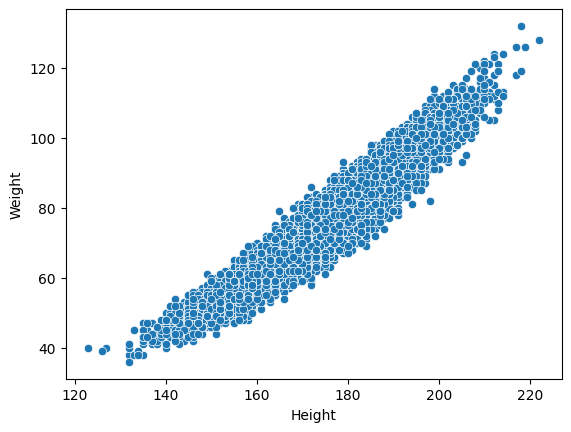

In [72]:
sns.scatterplot(x = 'Height', y = 'Weight', data = df)
plt.show()

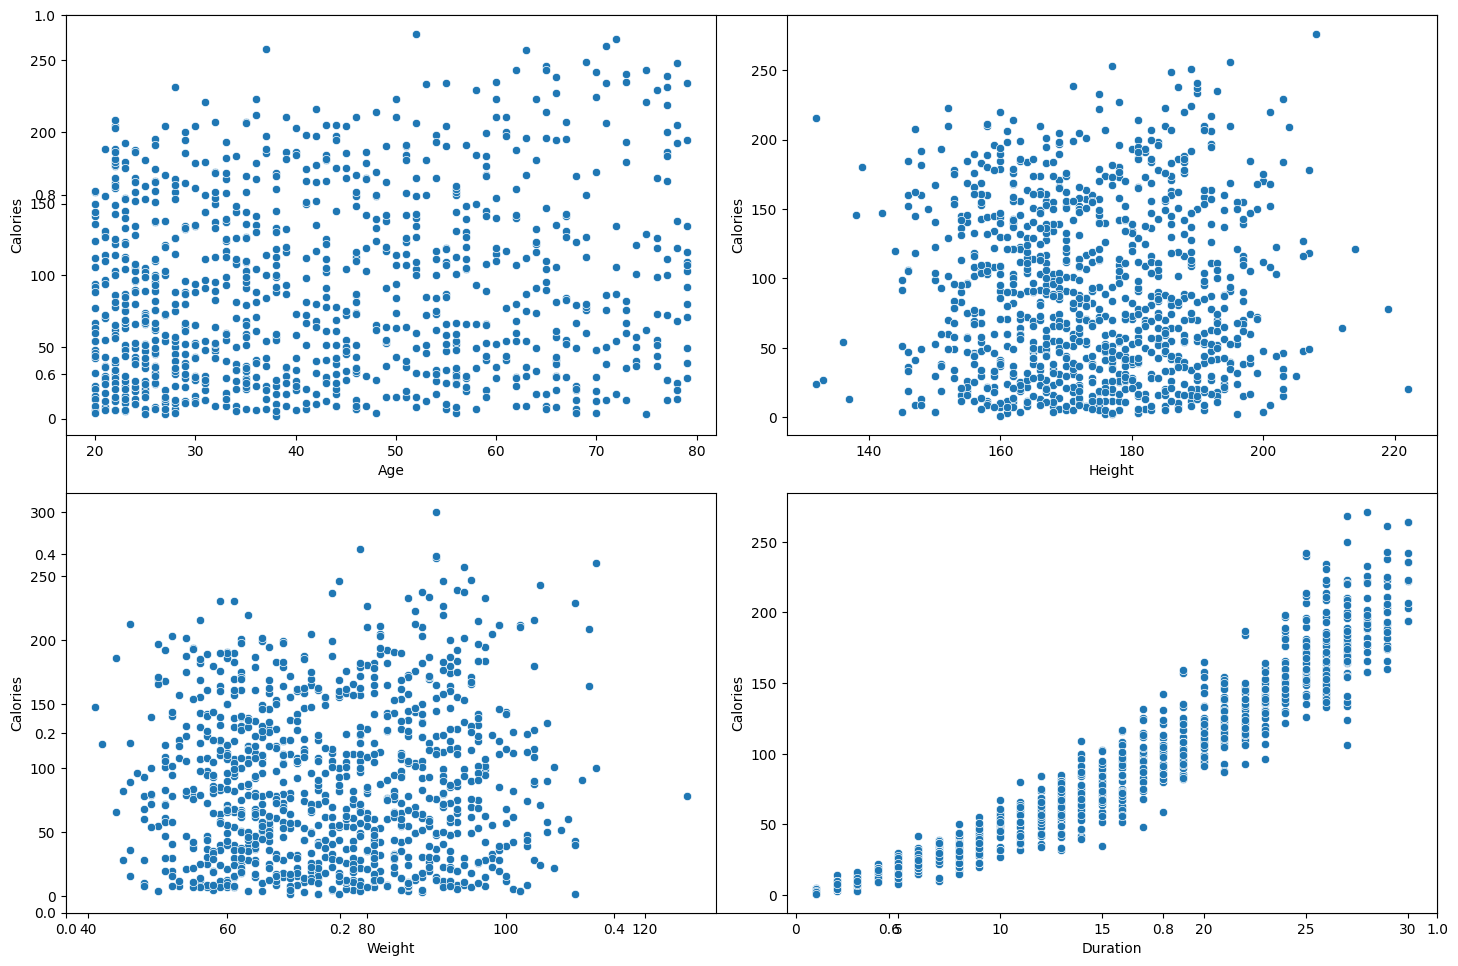

In [73]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize = (15,10))
for i, col in enumerate(features):
  plt.subplot(2,2, i+1)
  x=df.sample(1000)
  sns.scatterplot(x = col, y = 'Calories', data = x)
plt.tight_layout()
plt.show()

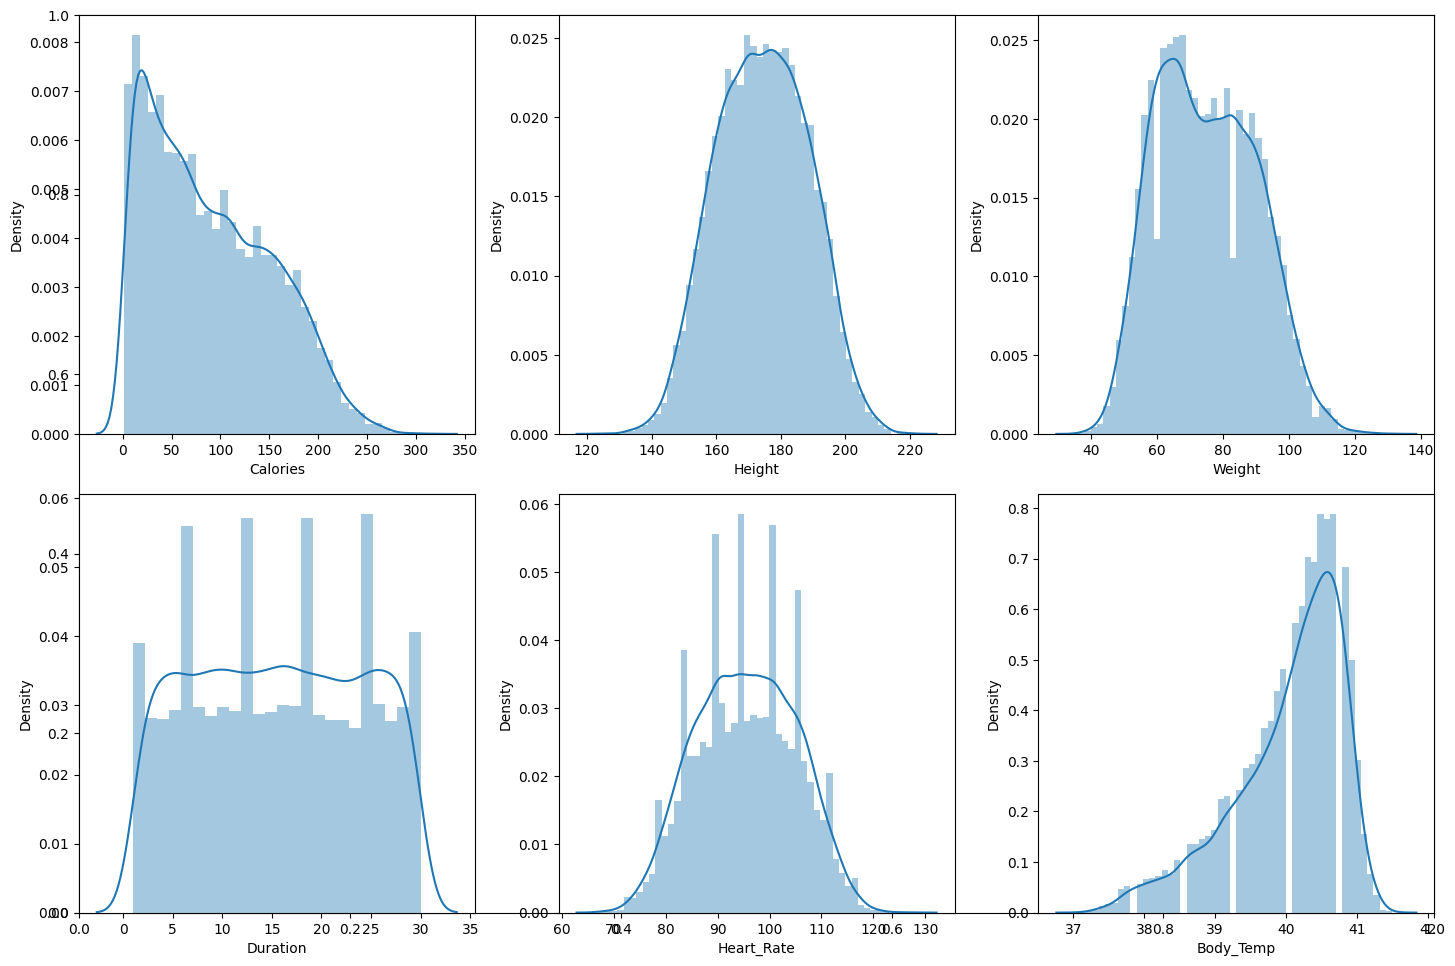

In [74]:
features = df.select_dtypes(include = 'float').columns

plt.subplots(figsize = (15,10))
for i,col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.tight_layout()
plt.show()


In [75]:
df.replace({'male' : 0, 'female' : 1}, inplace = True)
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8


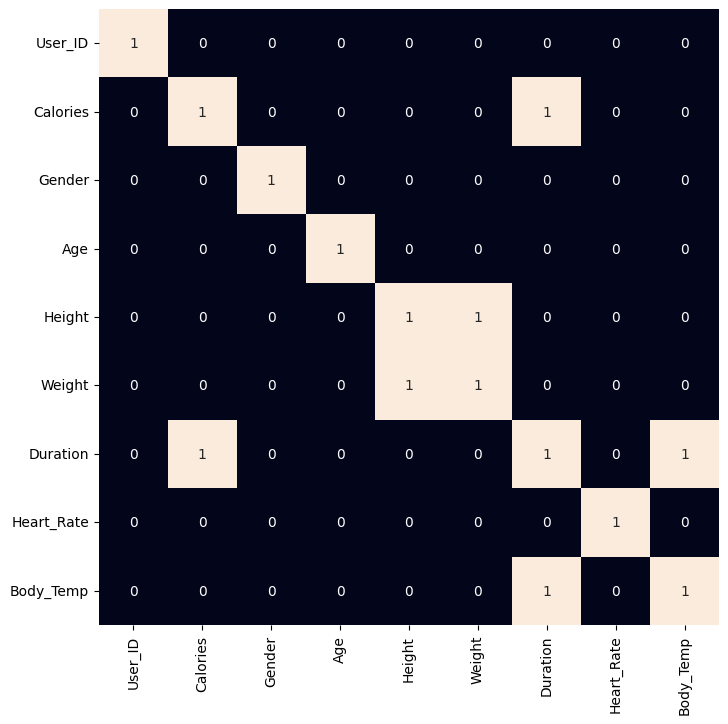

In [76]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr() > 0.9, annot = True, cbar = False)
plt.show()

In [77]:
remove = ['Weight', 'Duration']
df.drop(remove, axis = 1, inplace =True)

In [80]:
features = df.drop(['Calories', 'User_ID'], axis = 1)
target = df['Calories'].values

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 20)

X_train.shape, X_test.shape

((12000, 5), (3000, 5))

In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [86]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor(), Lasso(), Ridge()]

for i in range(len(models)):
  models[i].fit(X_train, y_train)
  print(f' {models[i]} : ')

  training_pred = models[i].predict(X_train)
  training_error = mae(y_train, training_pred)
  print(f'Training Error: {training_error}')


  testing_pred = models[i].predict(X_test)
  testing_error = mae(y_test, testing_pred)
  print(f'Testing Error: {testing_error}')
  print()

 LinearRegression() : 
Training Error: 17.922485667479837
Testing Error: 17.846920563148878

 XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) : 
Training Error: 7.599200539058695
Testing Error: 14.168671452971797

 RandomForestRegressor() : 
Training Error: 3.9708420846560846
Testing Error: 10.696

Since the Testing Error for XGBRegressor and RandomForestClassifier is the least - They are the best performed models for this.